# Code Comparisons

------

Tested Models include:

+ ARC
+ Process
+ ACT 1 & 2
+ Prev Code

In [1]:
using FusionSystems

Main.IJulia.set_current_module(FusionSystems)

return

In [2]:
cur_points = 160

cur_temps = linspace(0, 40, cur_points)

cur_decks = [:pulsed, :arc, :act_1, :act_2]

return

In [3]:
cur_solutions = Dict()

for cur_deck in cur_decks
    tmp_symbol = Symbol("$(cur_deck)_solution")
    isdefined(FusionSystems, tmp_symbol) || continue
    cur_solutions[cur_deck] = getfield(FusionSystems, tmp_symbol)()
end

In [4]:
cur_sweeps = Dict()

for cur_deck in cur_decks
    @time cur_sweeps[cur_deck] = Sweep(cur_temps, deck=cur_deck)
end

println("done.")

  9.186477 seconds (59.58 M allocations: 1001.980 MiB, 3.18% gc time)
  2.988778 seconds (26.01 M allocations: 430.803 MiB, 4.91% gc time)
  2.549324 seconds (33.93 M allocations: 551.381 MiB, 6.92% gc time)
  2.496868 seconds (25.36 M allocations: 413.841 MiB, 5.72% gc time)
done.


In [5]:
using Interact
using Plots

cur_fields = [ 
  "T_bar", "n_bar", "I_P", "R_0", "B_0",
  "tau_E", "p_bar", "P_F", "f_BS", "W_M", "cost", "eta_CD",
  "norm_beta_N", "norm_q_95", "norm_q_DV", "norm_P_E", "norm_P_W",
  "beta_N", "q_95", "q_DV", "P_E", "P_W",
]

sort!(cur_fields)

cur_xvars = deepcopy(cur_fields)
cur_yvars = deepcopy(cur_fields)

filter!(cur_var -> cur_var != "B_0", cur_xvars)
filter!(cur_var -> cur_var != "R_0", cur_yvars)

unshift!(cur_xvars, "B_0")
unshift!(cur_yvars, "R_0")

return

INFO: Interact.jl: using new nbwidgetsextension protocol


In [6]:
function add_limit!(cur_dict::Dict, tmp_sweep::Sweep, cur_limit::Symbol, cur_x::Symbol, cur_y::Symbol, maxx::Integer)
    cur_dict[cur_limit] = Dict(
        :x => get_limit_vars(tmp_sweep, cur_limit, cur_x, cur_last=maxx),
        :y => get_limit_vars(tmp_sweep, cur_limit, cur_y, cur_last=maxx),
        :t => get_limit_vars(tmp_sweep, cur_limit, :T_bar, cur_last=maxx)
    )
    
    nan_list = []
    
    append!(nan_list, find(isnan, cur_dict[cur_limit][:x]))
    append!(nan_list, find(isnan, cur_dict[cur_limit][:y]))
    append!(nan_list, find(isnan, cur_dict[cur_limit][:t]))
    
    nan_list = unique(nan_list)
    
    isempty(nan_list) && return
    
    deleteat!(cur_dict[cur_limit][:x], nan_list)
    deleteat!(cur_dict[cur_limit][:y], nan_list)
    deleteat!(cur_dict[cur_limit][:t], nan_list)
end

add_limit! (generic function with 1 method)

Interact.Options{:ToggleButtons,Bool}(39: "input-18" = true Bool , "beta", true, "true", 1, Interact.OptionDict(DataStructures.OrderedDict("true"=>true,"false"=>false), Dict(false=>"false",true=>"true")), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Bool}(41: "input-19" = true Bool , "kink", true, "true", 1, Interact.OptionDict(DataStructures.OrderedDict("true"=>true,"false"=>false), Dict(false=>"false",true=>"true")), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Bool}(43: "input-20" = true Bool , "pcap", true, "true", 1, Interact.OptionDict(DataStructures.OrderedDict("true"=>true,"false"=>false), Dict(false=>"false",true=>"true")), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Bool}(45: "input-21" = true Bool , "wall", true, "true", 1, Interact.OptionDict(DataStructures.OrderedDict("true"=>true,"false"=>false), Dict(false=>"false",true=>"true")), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Bool}(47: "input-22" = true Bool , "heat", true, "true", 1, Interact.OptionDict(DataStructures.OrderedDict("true"=>true,"false"=>false), Dict(false=>"false",true=>"true")), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Bool}(49: "input-23" = true Bool , "legend", true, "true", 1, Interact.OptionDict(DataStructures.OrderedDict("true"=>true,"false"=>false), Dict(false=>"false",true=>"true")), Any[], Any[], true, "horizontal", true)

Interact.Textbox{Int64}(51: "input-24" = 0 Int64 , "xmax", nothing, 0)

Interact.Textbox{Int64}(53: "input-25" = 0 Int64 , "ymax", nothing, 0)

Interact.Options{:ToggleButtons,String}(55: "input-26" = B_0 String , "xvar", "B_0", "B_0", 1, Interact.OptionDict(DataStructures.OrderedDict("B_0"=>"B_0","I_P"=>"I_P","P_E"=>"P_E","P_F"=>"P_F","P_W"=>"P_W","R_0"=>"R_0","T_bar"=>"T_bar","W_M"=>"W_M","beta_N"=>"beta_N","cost"=>"cost"…), Dict("W_M"=>"W_M","I_P"=>"I_P","n_bar"=>"n_bar","B_0"=>"B_0","P_W"=>"P_W","R_0"=>"R_0","eta_CD"=>"eta_CD","norm_q_DV"=>"norm_q_DV","p_bar"=>"p_bar","norm_P_W"=>"norm_P_W"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,String}(57: "input-27" = R_0 String , "yvar", "R_0", "R_0", 1, Interact.OptionDict(DataStructures.OrderedDict("R_0"=>"R_0","B_0"=>"B_0","I_P"=>"I_P","P_E"=>"P_E","P_F"=>"P_F","P_W"=>"P_W","T_bar"=>"T_bar","W_M"=>"W_M","beta_N"=>"beta_N","cost"=>"cost"…), Dict("W_M"=>"W_M","I_P"=>"I_P","n_bar"=>"n_bar","R_0"=>"R_0","B_0"=>"B_0","P_W"=>"P_W","eta_CD"=>"eta_CD","norm_q_DV"=>"norm_q_DV","p_bar"=>"p_bar","norm_P_W"=>"norm_P_W"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Symbol}(59: "input-28" = pulsed Symbol , "sweep", :pulsed, "pulsed", 1, Interact.OptionDict(DataStructures.OrderedDict("pulsed"=>:pulsed,"arc"=>:arc,"act_1"=>:act_1,"act_2"=>:act_2), Dict(:act_1=>"act_1",:pulsed=>"pulsed",:arc=>"arc",:act_2=>"act_2")), Any[], Any[], true, "horizontal", true)

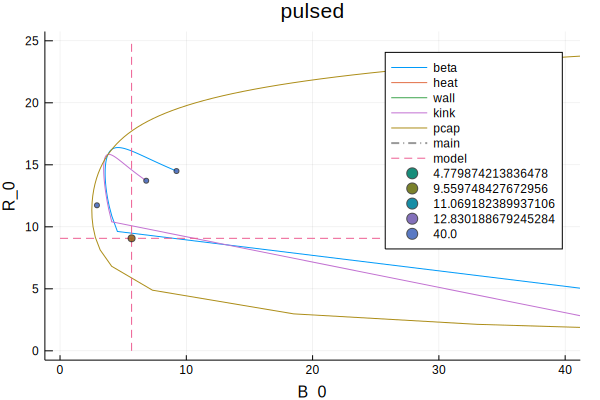

Failed to push!
    "f_BS"
to node
    57: "input-27" = f_BS String (active)

error at node: 61: "map(input-18, input-19, input-20, input-21, input-22, input-23, input-24, input-25, input-26, input-27, input-28)" = Plot{Plots.GRBackend() n=13} Any (active)
BoundsError: attempt to access 0-element Array{RecipesBase.RecipeData,1} at index [1]
getindex(::Array{RecipesBase.RecipeData,1}, ::Int64) at ./array.jl:554
_apply_type_recipe(::Dict{Symbol,Any}, ::Array{Any,1}) at /Users/dan/.julia/v0.6/Plots/src/series.jl:190
macro expansion at /Users/dan/.julia/v0.6/Plots/src/series.jl:237 [inlined]
apply_recipe(::Dict{Symbol,Any}, ::Array{Any,1}, ::Array{Any,1}) at /Users/dan/.julia/v0.6/RecipesBase/src/RecipesBase.jl:287
_process_userrecipes(::Plots.Plot{Plots.GRBackend}, ::Dict{Symbol,Any}, ::Tuple{Array{Any,1},Array{Any,1}}) at /Users/dan/.julia/v0.6/Plots/src/pipeline.jl:81
_plot!(::Plots.Plot{Plots.GRBackend}, ::Dict{Symbol,Any}, ::Tuple{Array{Any,1},Array{Any,1}}) at /Users/dan/.julia/v0.6/

Failed to push!
    "P_E"
to node
    57: "input-27" = P_E String (active)

error at node: 61: "map(input-18, input-19, input-20, input-21, input-22, input-23, input-24, input-25, input-26, input-27, input-28)" = Plot{Plots.GRBackend() n=13} Any (active)
BoundsError: attempt to access 0-element Array{RecipesBase.RecipeData,1} at index [1]
getindex(::Array{RecipesBase.RecipeData,1}, ::Int64) at ./array.jl:554
_apply_type_recipe(::Dict{Symbol,Any}, ::Array{Any,1}) at /Users/dan/.julia/v0.6/Plots/src/series.jl:190
macro expansion at /Users/dan/.julia/v0.6/Plots/src/series.jl:237 [inlined]
apply_recipe(::Dict{Symbol,Any}, ::Array{Any,1}, ::Array{Any,1}) at /Users/dan/.julia/v0.6/RecipesBase/src/RecipesBase.jl:287
_process_userrecipes(::Plots.Plot{Plots.GRBackend}, ::Dict{Symbol,Any}, ::Tuple{Array{Any,1},Array{Any,1}}) at /Users/dan/.julia/v0.6/Plots/src/pipeline.jl:81
_plot!(::Plots.Plot{Plots.GRBackend}, ::Dict{Symbol,Any}, ::Tuple{Array{Any,1},Array{Any,1}}) at /Users/dan/.julia/v0.6/Pl

In [10]:
@manipulate for beta=[true,false], kink=[true,false], pcap=[true,false], wall=[true,false], heat=[true,false], legend=[true,false], xmax=0, ymax=0, xvar=cur_xvars, yvar=cur_yvars, sweep=cur_decks
#     beta=true
#     kink=true 
#     pcap=true 
#     wall=true 
#     heat=true
    
    tmp_sweep = cur_sweeps[sweep]
    
    maxx = cur_points
    
    plot()

    cur_x = Symbol(xvar)
    cur_y = Symbol(yvar)
    
    cur_dict = Dict()
    
    beta && add_limit!(cur_dict, tmp_sweep, :beta, cur_x, cur_y, maxx)
    kink && add_limit!(cur_dict, tmp_sweep, :kink, cur_x, cur_y, maxx)
    pcap && add_limit!(cur_dict, tmp_sweep, :pcap, cur_x, cur_y, maxx)
    wall && add_limit!(cur_dict, tmp_sweep, :wall, cur_x, cur_y, maxx)
    heat && add_limit!(cur_dict, tmp_sweep, :heat, cur_x, cur_y, maxx)

    for (cur_key, cur_value) in cur_dict
        plot!(
            cur_value[:x], 
            cur_value[:y],
            label=cur_key
        )
    end
    
    plot!(
        get_limit_vars(tmp_sweep, :main, cur_x, cur_last=maxx),
        get_limit_vars(tmp_sweep, :main, cur_y, cur_last=maxx),
        linestyle=:dashdot, color=:black, label=:main, alpha=0.4, linewidth=2
    )
  
    t_pool = []
    x_pool = []
    y_pool = []
    
    for cur_value in values(cur_dict)
        append!(t_pool, cur_value[:t])
        append!(x_pool, cur_value[:x])
        append!(y_pool, cur_value[:y])
    end

    tmp_xmax = ( xmax >= 0 ) ? xmax : maximum(x_pool)
    tmp_ymax = ( ymax >= 0 ) ? ymax : maximum(y_pool) 

    if tmp_xmax == 0
        if xvar == "B_0" || xvar == "R_0" || xvar == "p_bar" || xvar == "p_bar"
            tmp_xmax = 40
        elseif startswith(xvar, "f_")
            tmp_xmax = 1
        elseif startswith(xvar, "norm_") || xvar == "cost"
            tmp_xmax = 5
        elseif maximum(x_pool) > 5000
            tmp_xmax = 5000
        else
            tmp_xmax = maximum(x_pool)
        end
    elseif tmp_xmax < minimum(x_pool)
        tmp_xmax = maximum(x_pool)
    else
        tmp_xmax = xmax
    end

    if tmp_ymax == 0
        if yvar == "R_0"
            tmp_ymax = 25
        elseif yvar == "B_0" || yvar == "p_bar" || yvar == "p_bar"
            tmp_ymax = 40
        elseif startswith(yvar, "f_")
            tmp_ymax = 1
        elseif startswith(yvar, "norm_") || yvar == "cost"
            tmp_ymax = 5
        elseif maximum(y_pool) > 5000
            tmp_ymax = 5000
        else
            tmp_ymax = maximum(y_pool)
        end
    elseif tmp_ymax < minimum(y_pool)
        tmp_ymax = maximum(y_pool)
    else
        tmp_ymax = ymax
    end
    
    if haskey(cur_solutions, sweep)
        cur_solution = cur_solutions[sweep]
        
        cur_cursor_x = getfield(cur_solution, Symbol(xvar))
        cur_cursor_y = getfield(cur_solution, Symbol(yvar))
        
        if cur_cursor_x == nothing && cur_cursor_y == nothing
            # do nothing
        elseif cur_cursor_x == nothing
            plot!(
                [ 0 , tmp_xmax ],
                [ cur_cursor_y , cur_cursor_y ],
                label="model", linestyle=:dash
            )
        elseif cur_cursor_y == nothing
            plot!(
                [ cur_cursor_x , cur_cursor_x ],
                [ 0 , tmp_ymax ],
                label="model", linestyle=:dash
            )
        else
            plot!(
                [ cur_cursor_x , cur_cursor_x , NaN , 0 , tmp_xmax ],
                [ 0 , tmp_ymax , NaN , cur_cursor_y , cur_cursor_y ],
                label="model", linestyle=:dash
            )

            scatter!(
                [cur_cursor_x], [cur_cursor_y], 
                label="", alpha=0.7, markersize=4
            )
        end
    end
    
    cur_min_pairs = Dict()
    cur_max_pairs = Dict()
    
    for cur_value in values(cur_dict)
        cur_min, cur_min_index = findmin(cur_value[:t])
        cur_max, cur_max_index = findmax(cur_value[:t])
        
        cur_min_tuple = (
            cur_value[:x][cur_min_index],
            cur_value[:y][cur_min_index]
        )
        
        if in(cur_min, keys(cur_min_pairs))
            push!(
                cur_min_pairs[cur_min],
                cur_min_tuple
            )
        else
            cur_min_pairs[cur_min] = [cur_min_tuple]
        end
        
        cur_max_tuple = (
            cur_value[:x][cur_max_index],
            cur_value[:y][cur_max_index]
        )
        
        if in(cur_max, keys(cur_max_pairs))
            push!(
                cur_max_pairs[cur_max],
                cur_max_tuple
            )
        else
            cur_max_pairs[cur_max] = [cur_max_tuple]
        end
    end
    
    for cur_key in sort(collect(keys(cur_min_pairs)))
        cur_x_dots = map(first, cur_min_pairs[cur_key])
        cur_y_dots = map(last, cur_min_pairs[cur_key])

        scatter!(
            cur_x_dots, 
            cur_y_dots,
            label=cur_key,
            alpha=0.7,
            markersize=3
        )
    end

    for cur_key in sort(collect(keys(cur_max_pairs)))
        cur_x_dots = map(first, cur_max_pairs[cur_key])
        cur_y_dots = map(last, cur_max_pairs[cur_key])

        scatter!(
            cur_x_dots, 
            cur_y_dots,
            label=cur_key,
            alpha=0.7,
            markersize=3
        )
    end
    
    xlabel!(xvar)
    ylabel!(yvar)
    
    xaxis!([0, tmp_xmax])
    yaxis!([0, tmp_ymax])
    
    title!(string(sweep))
    
    legend || plot!(legend=false)
    
    plot!()
end

In [8]:
tmp_sweeps = Dict(
    "1e2" => Sweep(linspace(0,40), tau_FT=1e2),
    "inf" => Sweep(linspace(0,40), is_pulsed=false),
    "1e3" => Sweep(linspace(0,40), tau_FT=1e3),
    "1e4" => Sweep(linspace(0,40), tau_FT=1e4),
    "1e5" => Sweep(linspace(0,40), tau_FT=1e5),
)

Dict{String,FusionSystems.Sweep} with 5 entries:
  "1e2" => FusionSystems.Sweep(AbstractFloat[0.0, 0.816327, 1.63265, 2.44898, 3…
  "1e5" => FusionSystems.Sweep(AbstractFloat[0.0, 0.816327, 1.63265, 2.44898, 3…
  "1e4" => FusionSystems.Sweep(AbstractFloat[0.0, 0.816327, 1.63265, 2.44898, 3…
  "inf" => FusionSystems.Sweep(AbstractFloat[0.0, 0.816327, 1.63265, 2.44898, 3…
  "1e3" => FusionSystems.Sweep(AbstractFloat[0.0, 0.816327, 1.63265, 2.44898, 3…

Interact.Options{:ToggleButtons,Bool}(63: "input-29" = true Bool , "legend", true, "true", 1, Interact.OptionDict(DataStructures.OrderedDict("true"=>true,"false"=>false), Dict(false=>"false",true=>"true")), Any[], Any[], true, "horizontal", true)

Interact.Textbox{Int64}(65: "input-30" = 0 Int64 , "xmax", nothing, 0)

Interact.Textbox{Int64}(67: "input-31" = 0 Int64 , "ymax", nothing, 0)

Interact.Options{:ToggleButtons,String}(69: "input-32" = B_0 String , "xvar", "B_0", "B_0", 1, Interact.OptionDict(DataStructures.OrderedDict("B_0"=>"B_0","I_P"=>"I_P","P_E"=>"P_E","P_F"=>"P_F","P_W"=>"P_W","R_0"=>"R_0","T_bar"=>"T_bar","W_M"=>"W_M","beta_N"=>"beta_N","cost"=>"cost"…), Dict("W_M"=>"W_M","I_P"=>"I_P","n_bar"=>"n_bar","B_0"=>"B_0","P_W"=>"P_W","R_0"=>"R_0","eta_CD"=>"eta_CD","norm_q_DV"=>"norm_q_DV","p_bar"=>"p_bar","norm_P_W"=>"norm_P_W"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,String}(71: "input-33" = R_0 String , "yvar", "R_0", "R_0", 1, Interact.OptionDict(DataStructures.OrderedDict("R_0"=>"R_0","B_0"=>"B_0","I_P"=>"I_P","P_E"=>"P_E","P_F"=>"P_F","P_W"=>"P_W","T_bar"=>"T_bar","W_M"=>"W_M","beta_N"=>"beta_N","cost"=>"cost"…), Dict("W_M"=>"W_M","I_P"=>"I_P","n_bar"=>"n_bar","R_0"=>"R_0","B_0"=>"B_0","P_W"=>"P_W","eta_CD"=>"eta_CD","norm_q_DV"=>"norm_q_DV","p_bar"=>"p_bar","norm_P_W"=>"norm_P_W"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,String}(73: "input-34" = 1e2 String , "sweep", "1e2", "1e2", 1, Interact.OptionDict(DataStructures.OrderedDict("1e2"=>"1e2","1e3"=>"1e3","1e4"=>"1e4","1e5"=>"1e5","inf"=>"inf"), Dict("1e2"=>"1e2","1e5"=>"1e5","1e4"=>"1e4","1e3"=>"1e3","inf"=>"inf")), Any[], Any[], true, "horizontal", true)

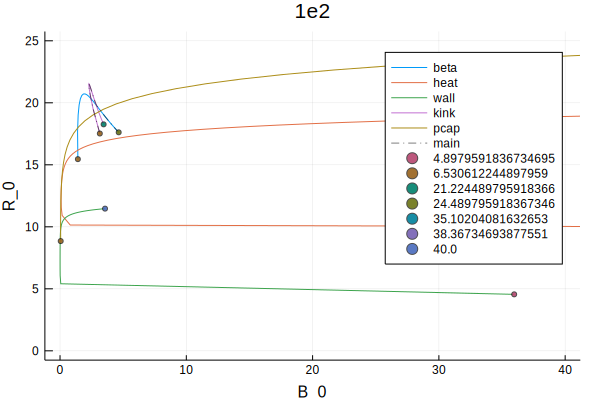

In [15]:
@manipulate for legend=[true,false], xmax=0, ymax=0, xvar=cur_xvars, yvar=cur_yvars, sweep=["1e2","1e3","1e4", "1e5", "inf"]
    beta=true
    kink=true 
    pcap=true 
    wall=true 
    heat=true
    main=true
    
    tmp_sweep = tmp_sweeps[sweep]
    
    maxx = cur_points
    
    plot()

    cur_x = Symbol(xvar)
    cur_y = Symbol(yvar)
    
    cur_dict = Dict()
    
    beta && add_limit!(cur_dict, tmp_sweep, :beta, cur_x, cur_y, maxx)
    kink && add_limit!(cur_dict, tmp_sweep, :kink, cur_x, cur_y, maxx)
    pcap && add_limit!(cur_dict, tmp_sweep, :pcap, cur_x, cur_y, maxx)
    wall && add_limit!(cur_dict, tmp_sweep, :wall, cur_x, cur_y, maxx)
    heat && add_limit!(cur_dict, tmp_sweep, :heat, cur_x, cur_y, maxx)
    
    for (cur_key, cur_value) in cur_dict
        plot!(
            cur_value[:x], 
            cur_value[:y],
            label=cur_key
        )
    end
  
    plot!(
        get_limit_vars(tmp_sweep, :main, cur_x, cur_last=maxx),
        get_limit_vars(tmp_sweep, :main, cur_y, cur_last=maxx),
        linestyle=:dashdot, color=:black, label=:main, alpha=0.5
    )
    
    t_pool = []
    x_pool = []
    y_pool = []
    
    for cur_value in values(cur_dict)
        append!(t_pool, cur_value[:t])
        append!(x_pool, cur_value[:x])
        append!(y_pool, cur_value[:y])
    end

    tmp_xmax = ( xmax >= 0 ) ? xmax : maximum(x_pool)
    tmp_ymax = ( ymax >= 0 ) ? ymax : maximum(y_pool) 

    if tmp_xmax == 0
        if xvar == "B_0" || xvar == "R_0" || xvar == "p_bar" || xvar == "p_bar"
            tmp_xmax = 40
        elseif startswith(xvar, "f_")
            tmp_xmax = 1
        elseif startswith(xvar, "norm_") || xvar == "cost"
            tmp_xmax = 5
        elseif maximum(x_pool) > 5000
            tmp_xmax = 5000
        else
            tmp_xmax = maximum(x_pool)
        end
    elseif tmp_xmax < minimum(x_pool)
        tmp_xmax = maximum(x_pool)
    else
        tmp_xmax = xmax
    end

    if tmp_ymax == 0
        if yvar == "R_0"
            tmp_ymax = 25
        elseif yvar == "B_0" || yvar == "p_bar" || yvar == "p_bar"
            tmp_ymax = 40
        elseif startswith(yvar, "f_")
            tmp_ymax = 1
        elseif startswith(yvar, "norm_") || yvar == "cost"
            tmp_ymax = 5
        elseif maximum(y_pool) > 5000
            tmp_ymax = 5000
        else
            tmp_ymax = maximum(y_pool)
        end
    elseif tmp_ymax < minimum(y_pool)
        tmp_ymax = maximum(y_pool)
    else
        tmp_ymax = ymax
    end
    
    if haskey(cur_solutions, sweep)
        cur_solution = cur_solutions[sweep]
        
        cur_cursor_x = getfield(cur_solution, Symbol(xvar))
        cur_cursor_y = getfield(cur_solution, Symbol(yvar))
        
        if cur_cursor_x == nothing && cur_cursor_y == nothing
            # do nothing
        elseif cur_cursor_x == nothing
            plot!(
                [ 0 , tmp_xmax ],
                [ cur_cursor_y , cur_cursor_y ],
                label="model", linestyle=:dash
            )
        elseif cur_cursor_y == nothing
            plot!(
                [ cur_cursor_x , cur_cursor_x ],
                [ 0 , tmp_ymax ],
                label="model", linestyle=:dash
            )
        else
            plot!(
                [ cur_cursor_x , cur_cursor_x , NaN , 0 , tmp_xmax ],
                [ 0 , tmp_ymax , NaN , cur_cursor_y , cur_cursor_y ],
                label="model", linestyle=:dash
            )

            scatter!(
                [cur_cursor_x], [cur_cursor_y], 
                label="", alpha=0.7, markersize=4
            )
        end
    end
    
    cur_min_pairs = Dict()
    cur_max_pairs = Dict()
    
    for cur_value in values(cur_dict)
        cur_min, cur_min_index = findmin(cur_value[:t])
        cur_max, cur_max_index = findmax(cur_value[:t])
        
        cur_min_tuple = (
            cur_value[:x][cur_min_index],
            cur_value[:y][cur_min_index]
        )
        
        if in(cur_min, keys(cur_min_pairs))
            push!(
                cur_min_pairs[cur_min],
                cur_min_tuple
            )
        else
            cur_min_pairs[cur_min] = [cur_min_tuple]
        end
        
        cur_max_tuple = (
            cur_value[:x][cur_max_index],
            cur_value[:y][cur_max_index]
        )
        
        if in(cur_max, keys(cur_max_pairs))
            push!(
                cur_max_pairs[cur_max],
                cur_max_tuple
            )
        else
            cur_max_pairs[cur_max] = [cur_max_tuple]
        end
    end
    
    for cur_key in sort(collect(keys(cur_min_pairs)))
        cur_x_dots = map(first, cur_min_pairs[cur_key])
        cur_y_dots = map(last, cur_min_pairs[cur_key])

        scatter!(
            cur_x_dots, 
            cur_y_dots,
            label=cur_key,
            alpha=0.7,
            markersize=3
        )
    end

    for cur_key in sort(collect(keys(cur_max_pairs)))
        cur_x_dots = map(first, cur_max_pairs[cur_key])
        cur_y_dots = map(last, cur_max_pairs[cur_key])

        scatter!(
            cur_x_dots, 
            cur_y_dots,
            label=cur_key,
            alpha=0.7,
            markersize=3
        )
    end
    
    xlabel!(xvar)
    ylabel!(yvar)
    
    xaxis!([0, tmp_xmax])
    yaxis!([0, tmp_ymax])
    
    title!(string(sweep))
    
    legend || plot!(legend=false)
    
    plot!()
end

In [14]:
tmp_sweeps["1e2"]

FusionSystems.Sweep(AbstractFloat[0.0, 0.816327, 1.63265, 2.44898, 3.26531, 4.08163, 4.89796, 5.71429, 6.53061, 7.34694  …  32.6531, 33.4694, 34.2857, 35.102, 35.9184, 36.7347, 37.551, 38.3673, 39.1837, 40.0], nothing, FusionSystems.AbstractReactor[FusionSystems.Reactor
  T_bar: Float64 0.0
  n_bar: SymEngine.Basic
  I_P: SymEngine.Basic
  R_0: Float64 NaN
  B_0: Float64 NaN
  sigma_v: Float64 NaN
  mode_scaling: Dict{Symbol,Float64}
  deck: Void nothing
  is_pulsed: Bool true
  is_symbolic: Bool false
  is_solved: Bool true
  is_good: Bool false
  H: Float64 1.1
  Q: Float64 39.86
  epsilon: Float64 0.3226
  kappa_95: Float64 1.59
  delta_95: Float64 0.333
  nu_n: Float64 0.27
  nu_T: Float64 1.094
  nu_n_offset: Float64 0.73
  nu_T_offset: Float64 0.356
  Z_eff: Float64 2.584
  f_D: Float64 0.7753
  A: Float64 2.735
  l_i: Float64 1.155
  rho_m: Float64 0.0
  gamma: Float64 -2.02534
  N_G: Float64 1.2
  eta_T: Float64 0.3531
  eta_RF: Float64 0.4
  tau_WK: Float64 1830.0
  tau_FT: Fl